##Installing Detectron-2

In [1]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-81y5vzcn
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-81y5vzcn
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done


##Downloading Dataset

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5nAESdZUJDBa6zqZaEpG")
project = rf.workspace("satellite-iteka").project("correction-zxtc7")
version = project.version(3)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...


##Configuring Deteron-2

In [3]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

# Register the dataset
dataset_path = "./correction-3"
register_coco_instances("train_set", {}, os.path.join(dataset_path, "train/_annotations.coco.json"), os.path.join(dataset_path, "train"))
register_coco_instances("valid_set", {}, os.path.join(dataset_path, "valid/_annotations.coco.json"), os.path.join(dataset_path, "valid"))
register_coco_instances("test_set", {}, os.path.join(dataset_path, "test/_annotations.coco.json"), os.path.join(dataset_path, "test"))

##Configuring the Model for Training

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_set",)
cfg.DATASETS.TEST = ("valid_set",)
cfg.DATALOADER.NUM_WORKERS = 2

# Model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8
cfg.OUTPUT_DIR = "/content/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

##Training the Model

In [6]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/03 16:07:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 192MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/03 16:07:32 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)


[11/03 16:07:48 d2.utils.events]:  eta: 0:06:48  iter: 19  total_loss: 6.014  loss_cls: 2.3  loss_box_reg: 0.7537  loss_mask: 0.693  loss_rpn_cls: 1.974  loss_rpn_loc: 0.289    time: 0.4319  last_time: 0.4962  data_time: 0.0407  last_data_time: 0.0335   lr: 4.9953e-06  max_mem: 1768M
[11/03 16:08:00 d2.utils.events]:  eta: 0:06:27  iter: 39  total_loss: 4.937  loss_cls: 2.171  loss_box_reg: 0.7106  loss_mask: 0.6927  loss_rpn_cls: 1.116  loss_rpn_loc: 0.3128    time: 0.4144  last_time: 0.4474  data_time: 0.0180  last_data_time: 0.0163   lr: 9.9902e-06  max_mem: 1772M
[11/03 16:08:07 d2.utils.events]:  eta: 0:06:06  iter: 59  total_loss: 4.282  loss_cls: 1.987  loss_box_reg: 0.7868  loss_mask: 0.6922  loss_rpn_cls: 0.6261  loss_rpn_loc: 0.2806    time: 0.4030  last_time: 0.3267  data_time: 0.0182  last_data_time: 0.0057   lr: 1.4985e-05  max_mem: 1772M
[11/03 16:08:14 d2.utils.events]:  eta: 0:05:44  iter: 79  total_loss: 4.017  loss_cls: 1.738  loss_box_reg: 0.7185  loss_mask: 0.6915  

##Evaluation and Inference

[11/03 16:28:08 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/correction-3/output/model_final.pth ...


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


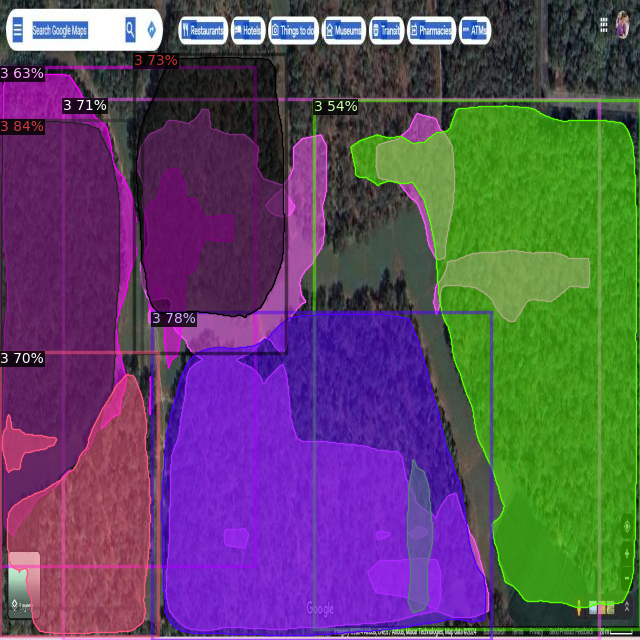

-1

In [12]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
import cv2
# Import the cv2_imshow function from google.colab.patches
from google.colab.patches import cv2_imshow

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/MyDrive/correction-3/output/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# Run inference on a test image
img_path = "/content/drive/MyDrive/correction-3/test/Screenshot-2024-04-23-140717_png_jpg.rf.5366e32a6cd94c6726c4a8acbfa27ca1.jpg"
img = cv2.imread(img_path)
outputs = predictor(img)

# Visualize the results
v = Visualizer(img[:, :, ::-1], metadata={}, scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# Use cv2_imshow instead of cv2.imshow to display the image
cv2_imshow(out.get_image()[:, :, ::-1])
cv2.waitKey(0)